In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
# Importing du dataframe 
df =pd.read_csv('data.csv')

#In this dataset i do some modifications : 
#the floats are writen with a ',' in place of '.'. 
#in the technologies there is containing 2 '/' which created more categories

df["Experience"]= df["Experience"].str.replace(",", ".") 
df["Technologies"]= df["Technologies"].str.replace("//", "/") 

print()

In [3]:
print('the desciption of the dataframe is : ')
df.describe()

the desciption of the dataframe is : 


,Entreprise,Metier,Technologies,Diplome,Experience,Ville
count,9565,9563,9582,9582,9488,9582
unique,1382,4,56,4,21,14
top,Ball Aerospace,Data scientist,SQL/R/Python/Big data,Master,1.5,Paris
freq,748,3865,540,4971,1023,2015


In [4]:
print('The missing values of the dataframe : \n', df.isnull().sum())

The missing values of the dataframe : 
 Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


In [5]:
# getting indexes of missing values in experience coloumn 'Experience' :
idx_missing_values_experience=np.where(df['Experience'].isnull()==True)

#calculing the median and the average of the experience coloumn
average = pd.to_numeric(df["Experience"], errors='coerce').mean()
median = pd.to_numeric(df["Experience"], errors='coerce').median()

# remplacing missing values with median for data scientists and average for Data engineers
for idx in idx_missing_values_experience[0] :
    if df['Metier'][idx]=='Data scientist':
        df.loc[idx,'Experience']=median
    elif df['Metier'][idx]=='Data engineer' :
        df.loc[idx,'Experience']=average

print('Double cheking that missing have been imputed : \n', df.isnull().sum())

Double cheking that missing have been imputed : 
 Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
dtype: int64


In [6]:
#calculing the average of every categorie .
average_data_scientists = round(pd.to_numeric(df[df['Metier']=='Data scientist']["Experience"], errors='coerce').mean(),1)
average_lead_data_scientists = round(pd.to_numeric(df[df['Metier']=='Lead data scientist']["Experience"], errors='coerce').mean(),1)
average_data_engineers = round(pd.to_numeric(df[df['Metier']=='Data engineer']["Experience"], errors='coerce').mean(),1)
print("the average experience for data scientists : ",average_data_scientists)
print("the average experience for lead data scientists : ",average_lead_data_scientists)
print("the average for data engineers : ",average_data_engineers)


the average experience for data scientists :  2.2
the average experience for lead data scientists :  4.0
the average for data engineers :  3.0


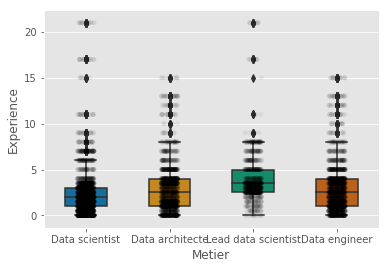

In [7]:
df["Experience"]=pd.to_numeric(df["Experience"], errors='coerce').astype(np.float32)

# make boxplot with Seaborn
bplot=sb.boxplot(y='Experience', x='Metier', data=df,width=0.5,palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sb.stripplot(y='Experience', x='Metier', data=df,  jitter=True,   marker='o', alpha=0.05, color='black')



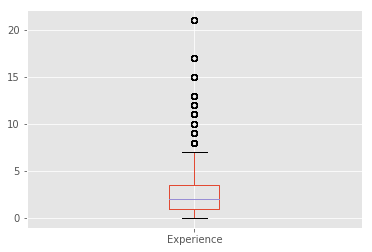

In [8]:
df.boxplot(column= 'Experience')


In [9]:
#Transform experience variable to categorical values.

#calculating average for data architectes
average_data_architectes = round(pd.to_numeric(df[df['Metier']=='Data architecte']["Experience"], errors='coerce').mean(),1)

#indexes of missing values
idx_missing_values_experience=np.where(df['Experience'].isnull()==True)

#imputation of missing value for data architecte and lead data scietists
for idx in idx_missing_values_experience[0] :
    if df['Metier'][idx]=='Data architecte': 
        df.loc[idx,'Experience']=average_data_architectes 
    elif df['Metier'][idx]=='Lead data scientist' :
        df.loc[idx,'Experience']=average_lead_data_scientists

#calculating the average of experience of all profils
average_experience= round(pd.to_numeric(df[df['Metier']=='Data scientist']["Experience"], errors='coerce').mean(),1)


for idx in range (len(df)):

    if df['Experience'][idx] <= average_experience :
        Exp_label='beginner'
    elif average_experience < df['Experience'][idx] <= average_lead_data_scientists :
        Exp_label='confirmed'

    elif average_lead_data_scientists< df['Experience'][idx] <=10 : 
        Exp_label='advanced'

    elif df['Experience'][idx] >10 : 
        Exp_label='expert'
    df["Experience"][idx]=Exp_label




c:\programdata\anaconda3\envs\nanovare\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\programdata\anaconda3\envs\nanovare\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
#most Used technologies
df['Technologies'].value_counts()[0:5]
Frequences=df['Technologies'].value_counts()[0:5]
print(Frequences)

SQL/R/Python/Big data                                 540
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    458
C++/R/Python/Matlab/Matplotlib                        273
SPSS/Excel/SAS/R/machine learning/AI/Scoring          250
Hadoop/Hive/Vertica/Tableau                           250
Name: Technologies, dtype: int64


Text(0,0.5,'Frequences')

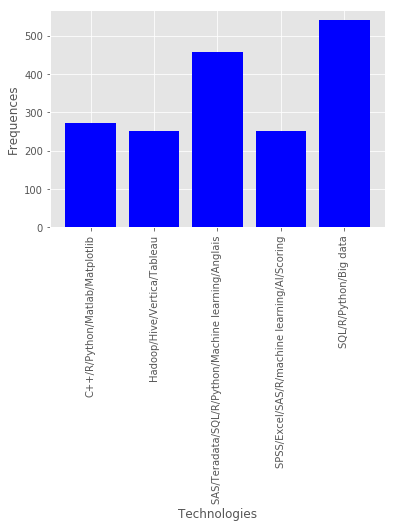

In [11]:
#print histogram of these technologies
counts = df['Technologies'].value_counts().to_dict()
list_keys = [ k for i,k in enumerate (counts) if i<5]

plt.bar(list_keys,Frequences,align='center',color='blue') 

plt.xticks(rotation=90)
plt.xlabel('Technologies')
plt.ylabel('Frequences')




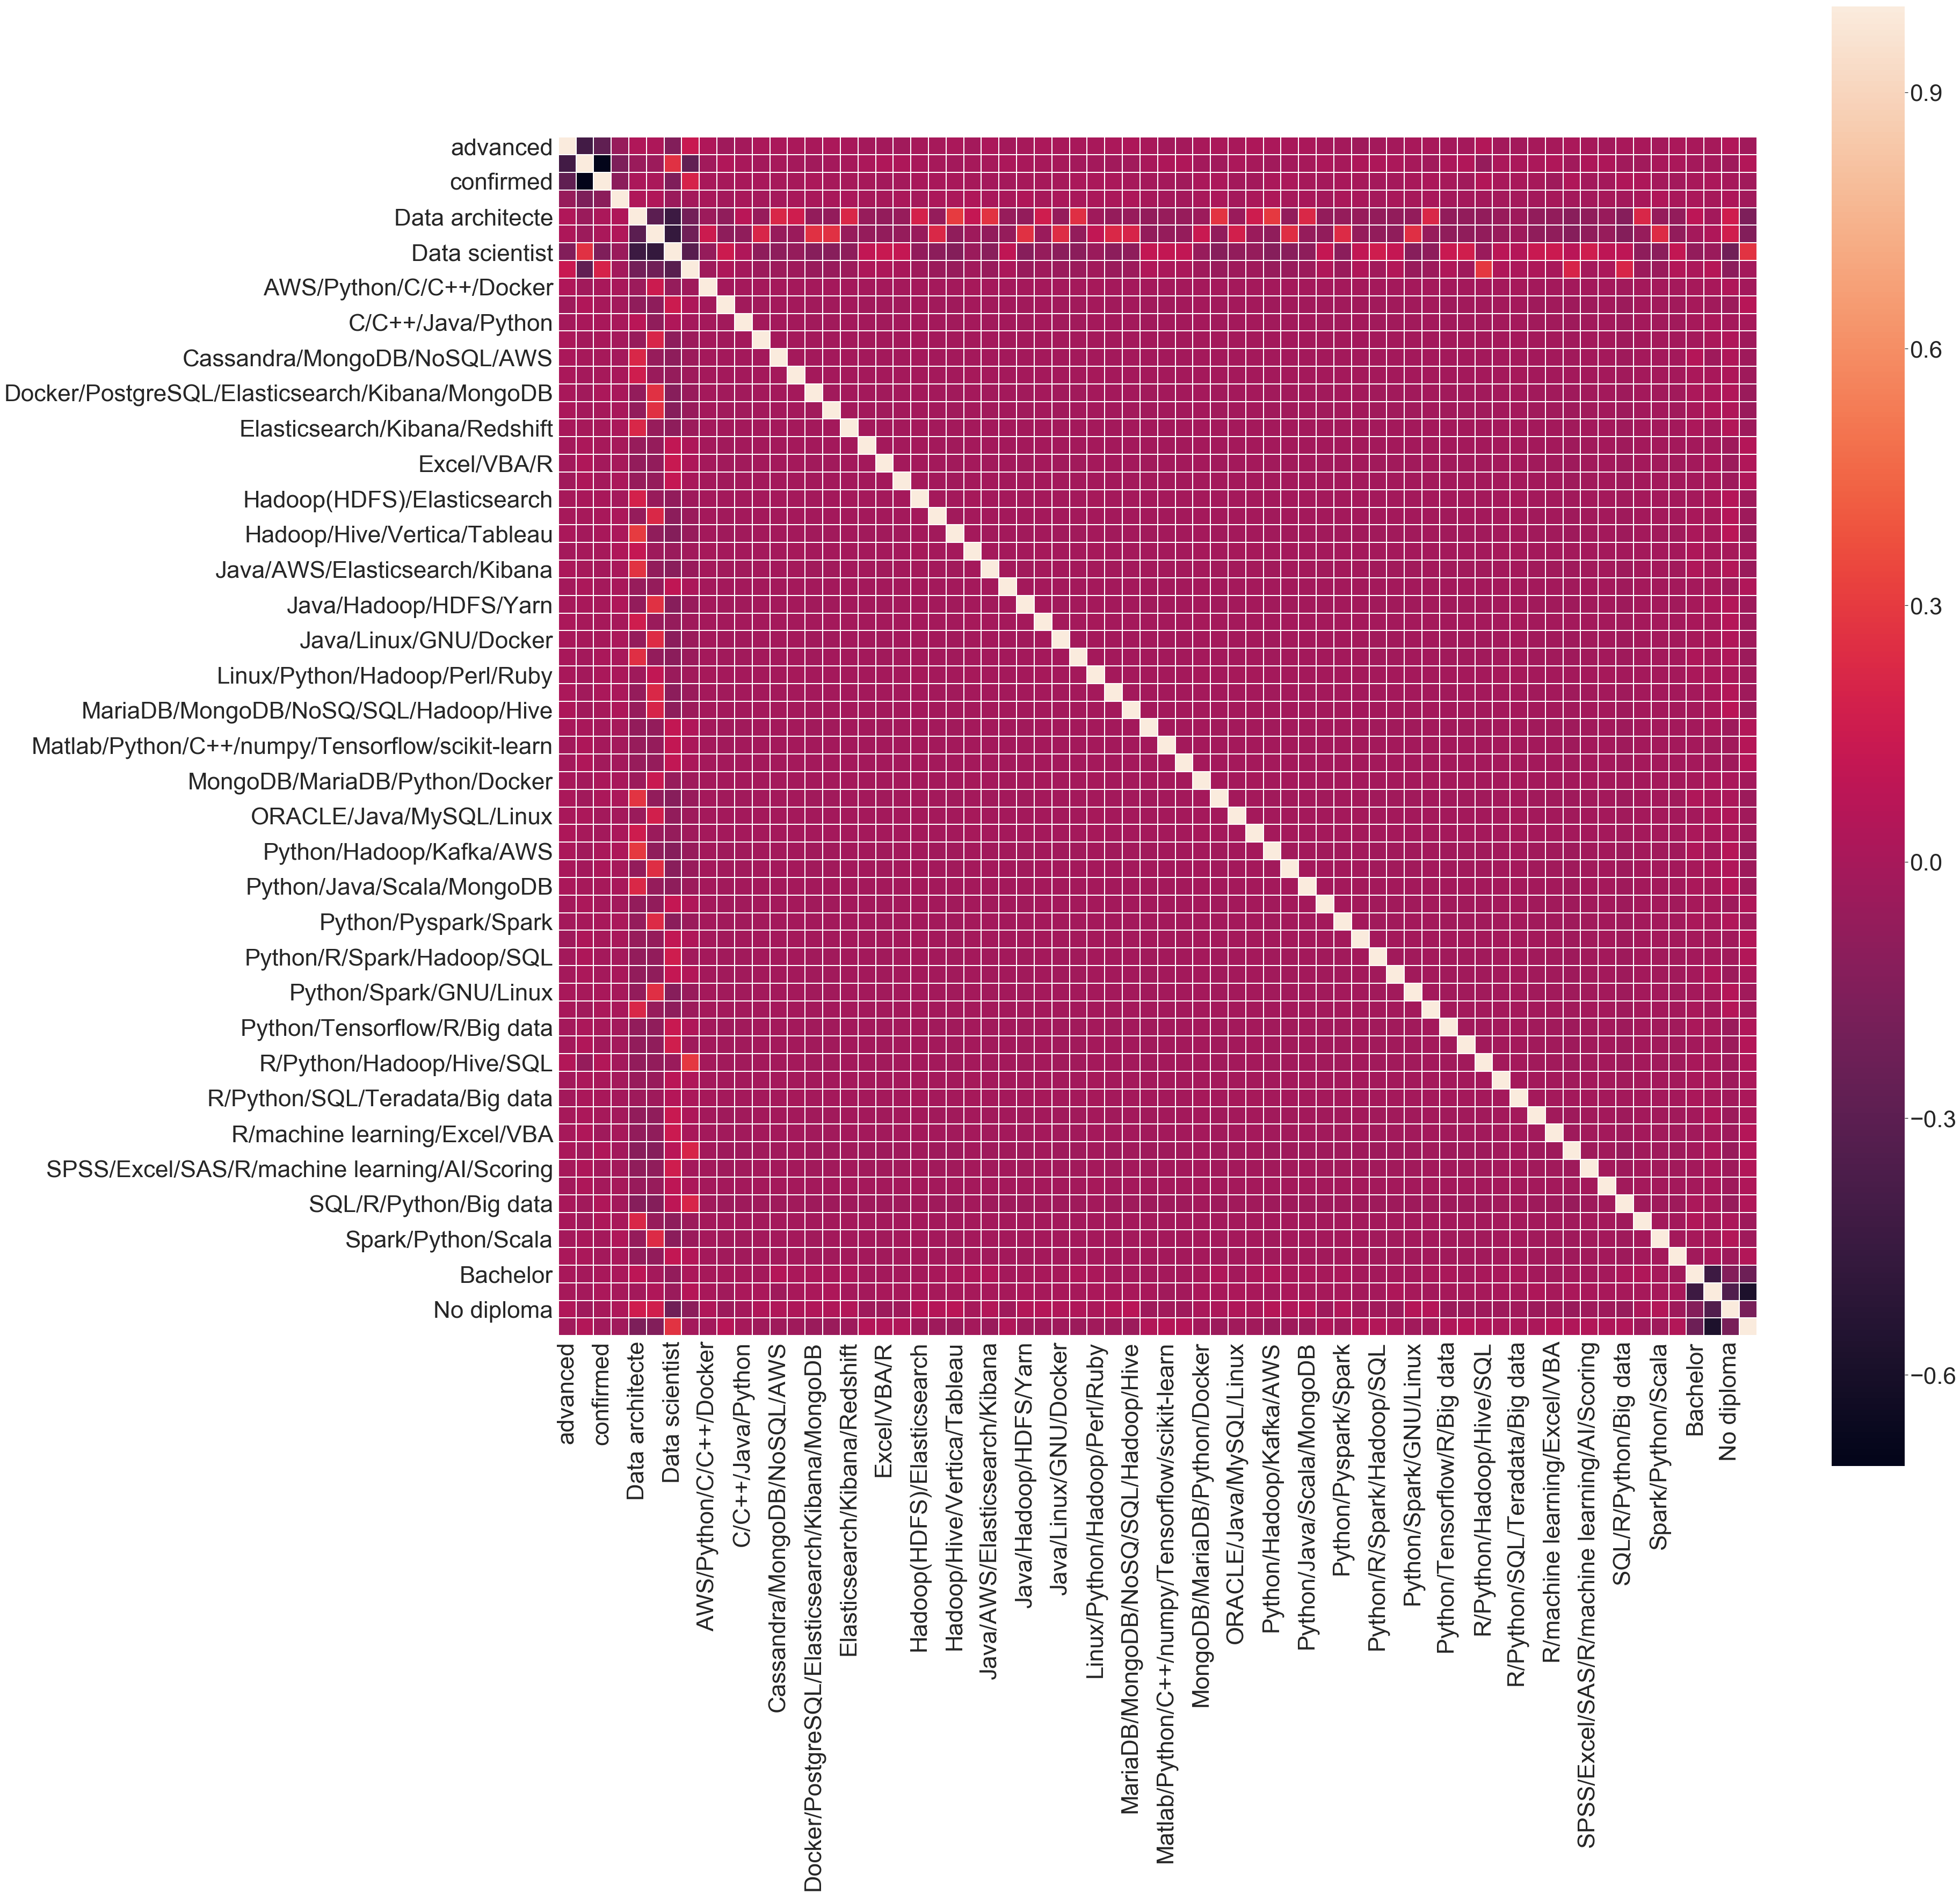

In [12]:
#Heat map of correlation matrix of the dataframe.

# I apply one_hot_coding for categorical variables.

#j'ignore les variable et entreprise.
small_df=df[['Experience','Metier','Technologies','Diplome']]
dfDummies = pd.get_dummies(small_df ,prefix='', prefix_sep='')
plt.figure(figsize=(50, 50))
sb.set(font_scale=4)
cor = dfDummies.corr() 
sb.heatmap(cor,linewidths=1, square = True)

0.15678995745157154

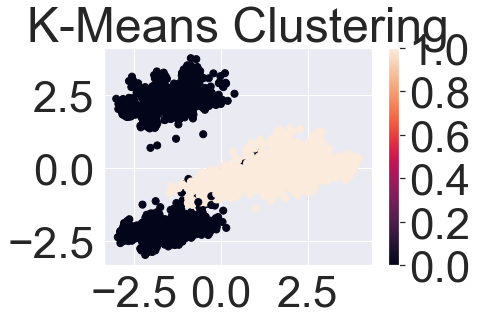

In [13]:
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#i apply a first clustering with all categories
dfDummies = pd.get_dummies(df ,prefix='', prefix_sep='')
dfDummies_standardisé = StandardScaler().fit_transform(dfDummies)

# je selectionne 10 composantes principale
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(dfDummies_standardisé)
kmeans = KMeans(n_clusters=2, random_state=0,init='random')
kmeans.fit(principalComponents)
principalComponents=np.array(principalComponents)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalComponents[:,0],principalComponents[:,1],c=kmeans.labels_,s=50)
ax.set_title('K-Means Clustering')
plt.colorbar(scatter)

silhouette_score(principalComponents, kmeans.labels_)

0.6724648122847274


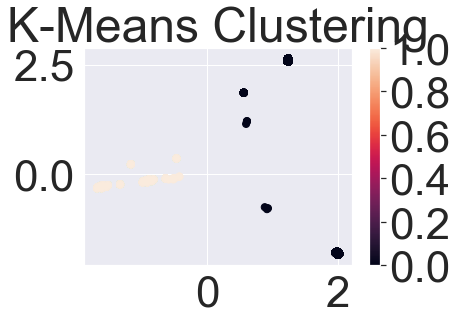

In [14]:
# # i apply a second clustering with 'Metier' and 'experience'.

new_df=df[['Metier','Technologies']]
dfDummies = pd.get_dummies(new_df ,prefix='', prefix_sep='')
dfDummies_standardisé = StandardScaler().fit_transform(dfDummies)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfDummies_standardisé)
kmeans = KMeans(n_clusters=2, init='random',n_init=1000, max_iter=10, tol=1e-05, random_state=0)
kmeans.fit(principalComponents)
principalComponents=np.array(principalComponents)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalComponents[:,0],principalComponents[:,1],c=kmeans.labels_,s=50)
ax.set_title('K-Means Clustering')
plt.colorbar(scatter)
print(silhouette_score(principalComponents, kmeans.labels_))

In [15]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier



In [16]:
#i create a subset with labelised part of the dataframe to train the model 
df_cleaned=df[df['Metier'].notnull()]

X_cleaned=df_cleaned[['Technologies','Diplome','Experience']]
Y_cleaned=df_cleaned[['Metier']]

#apply onehotcoding for Xdata
X_cleaned= pd.get_dummies(X_cleaned)

#split dataset to train and testing the model.
X_train,X_test,Y_train,Y_test=train_test_split(X_cleaned,Y_cleaned,test_size=0.2)

#Coding the Ylabel into multiclass.
encoder = preprocessing.LabelEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)
encoder.fit(Y_test)
Y_test = encoder.transform(Y_test)


c:\programdata\anaconda3\envs\nanovare\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\programdata\anaconda3\envs\nanovare\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Grid search to train the SVM classifier
'''
# Definition des parametres pour le SVM gridsearch
parametres = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#Entrainement des differets models SVM avec les differents parametres.
svm_model = GridSearchCV(SVC(), parametres, cv=5)
svm_model.fit(X_train, Y_train)

# Affichage des meilleurs parametres
print('Meilleur configuration pour le SVM:',svm_model.best_estimator_,"\n") 

#recuperation du meilleur model afin d'effectuer une mesure de performance basé sur l'accuracy et le F1_score obtenu par la 
# classification report
svm_model = svm_model.best_estimator_
Y_pred = svm_model.predict(X_test)

#affichage des results.
print("Score sur les données d'entrainement pour le SVM: %f" % svm_model.score(X_train , Y_train))
print("Score sur les données test pour le SVM: %f" % svm_model.score(X_test  , Y_test ))

print(classification_report(Y_test, Y_pred)) 
'''

'\n# Definition des parametres pour le SVM gridsearch\nparametres = [{\'kernel\': [\'rbf\'], \'gamma\': [1e-3, 1e-4],\n                     \'C\': [1, 10, 100, 1000]},\n                    {\'kernel\': [\'linear\'], \'C\': [1, 10, 100, 1000]}]\n\n#Entrainement des differets models SVM avec les differents parametres.\nsvm_model = GridSearchCV(SVC(), parametres, cv=5)\nsvm_model.fit(X_train, Y_train)\n\n# Affichage des meilleurs parametres\nprint(\'Meilleur configuration pour le SVM:\',svm_model.best_estimator_,"\n") \n\n#recuperation du meilleur model afin d\'effectuer une mesure de performance basé sur l\'accuracy et le F1_score obtenu par la \n# classification report\nsvm_model = svm_model.best_estimator_\nY_pred = svm_model.predict(X_test)\n\n#affichage des results.\nprint("Score sur les données d\'entrainement pour le SVM: %f" % svm_model.score(X_train , Y_train))\nprint("Score sur les données test pour le SVM: %f" % svm_model.score(X_test  , Y_test ))\n\nprint(classification_report

In [18]:
#Grid search for RF classifier
'''
#Definition des parametres pour le RF gridsearch
rf = RandomForestClassifier() 

parametres = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

RF = GridSearchCV(estimator=rf, param_grid=parametres, cv= 5)
RF.fit(X_train, Y_train)

#Affichage des meilleurs parametres
print('Meilleur configuration pour le RF:',RF.best_estimator_,"\n") 


# recuperation du meilleur model afin d'effectuer une mesure de performance basé sur l'accuracy et le F1_score obtenu par la 
# classification report
rf_model = RF.best_estimator_
print("Score sur les données d'entrainements pour le RF: %f" % rf_model.score(X_train , Y_train))
print("Score sur les données test pour le RF: %f" % rf_model.score(X_test  , Y_test ))
Y_pred = rf_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
 '''

'\n#Definition des parametres pour le RF gridsearch\nrf = RandomForestClassifier() \n\nparametres = { \n    \'n_estimators\': [200, 700],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\nRF = GridSearchCV(estimator=rf, param_grid=parametres, cv= 5)\nRF.fit(X_train, Y_train)\n\n#Affichage des meilleurs parametres\nprint(\'Meilleur configuration pour le RF:\',RF.best_estimator_,"\n") \n\n\n# recuperation du meilleur model afin d\'effectuer une mesure de performance basé sur l\'accuracy et le F1_score obtenu par la \n# classification report\nrf_model = RF.best_estimator_\nprint("Score sur les données d\'entrainements pour le RF: %f" % rf_model.score(X_train , Y_train))\nprint("Score sur les données test pour le RF: %f" % rf_model.score(X_test  , Y_test ))\nY_pred = rf_model.predict(X_test)\nprint(classification_report(Y_test, Y_pred))\n '

In [19]:
# Grid search for MLP classifier
'''

mlp = MLPClassifier(max_iter=100)
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#Entrainement des differets models MLP avec les differents parametres.
Mlp = GridSearchCV(mlp, parameters, n_jobs=-1, cv=3)
Mlp.fit(X_train, Y_train)

# Affichage des meilleurs parametres
print('Meilleur configuration pour le MLP:',Mlp.best_estimator_,"\n") 

#recuperation du meilleur model afin d'effectuer une mesure de performance basé sur l'accuracy et le F1_score obtenu par la 
# classification report
MLP_model = Mlp.best_estimator_
print("Training set score for MLP: %f" % MLP_model.score(X_train , Y_train))
print("Testing  set score for MLP: %f" % MLP_model.score(X_test  , Y_test ))
Y_pred = MLP_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
'''

'\n\nmlp = MLPClassifier(max_iter=100)\nparameters = {\n    \'hidden_layer_sizes\': [(50,50,50), (50,100,50), (100,)],\n    \'activation\': [\'tanh\', \'relu\'],\n    \'solver\': [\'sgd\', \'adam\'],\n    \'alpha\': [0.0001, 0.05],\n    \'learning_rate\': [\'constant\',\'adaptive\'],\n}\n\n#Entrainement des differets models MLP avec les differents parametres.\nMlp = GridSearchCV(mlp, parameters, n_jobs=-1, cv=3)\nMlp.fit(X_train, Y_train)\n\n# Affichage des meilleurs parametres\nprint(\'Meilleur configuration pour le MLP:\',Mlp.best_estimator_,"\n") \n\n#recuperation du meilleur model afin d\'effectuer une mesure de performance basé sur l\'accuracy et le F1_score obtenu par la \n# classification report\nMLP_model = Mlp.best_estimator_\nprint("Training set score for MLP: %f" % MLP_model.score(X_train , Y_train))\nprint("Testing  set score for MLP: %f" % MLP_model.score(X_test  , Y_test ))\nY_pred = MLP_model.predict(X_test)\nprint(classification_report(Y_test, Y_pred))\n'

In [20]:
# based on F1-score and recall. all the models gaves approximatively the same result. i decided to go with the MLP because 
#training time and execution time is much smaller.

indexes_missings_metier=df[df['Metier'].isnull()].index.tolist()
cutted_df=df[['Technologies','Diplome','Experience']]
dfDummies = pd.get_dummies(cutted_df ,prefix='', prefix_sep='')

X_to_predict=dfDummies.loc[np.array(indexes_missings_metier), :]
MLP_model = MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) 

MLP_model.fit(X_train, Y_train)


print("Training set score for MLP: %f" % MLP_model.score(X_train , Y_train))
print("Testing  set score for MLP: %f" % MLP_model.score(X_test  , Y_test ))
Y_pred = MLP_model.predict(X_test)
print(classification_report(Y_test, Y_pred))


Training set score for MLP: 0.898954
Testing  set score for MLP: 0.891793
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       417
          1       1.00      1.00      1.00       489
          2       0.81      0.95      0.87       751
          3       0.73      0.37      0.49       256

avg / total       0.89      0.89      0.88      1913



c:\programdata\anaconda3\envs\nanovare\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
#predict Missing Metiers.
Y_pred = MLP_model.predict(X_to_predict)

#decoding the precited values.
Y_pred = encoder.inverse_transform(Y_pred)
print(Y_pred)

['Data engineer' 'Data scientist' 'Data scientist' 'Data scientist'
 'Data architecte' 'Data scientist' 'Data scientist' 'Lead data scientist'
 'Data engineer' 'Data scientist' 'Data architecte' 'Data engineer'
 'Data architecte' 'Data scientist' 'Data engineer' 'Data scientist'
 'Data architecte' 'Data scientist' 'Data scientist']


c:\programdata\anaconda3\envs\nanovare\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
